

---


#  🟢 Transforma arquivo binário em netcdf


---
**DADOS**:

 - Dados: Arquivo binário de temperatura de brilho do canal CH04 (10.70 µm) do sensor GOES IMAGER do satélite GOES-13 - https://ftp.cptec.inpe.br/goes/goes13/retangular_4km/ch4_bin/


---
**REALIZAÇÃO**:


- Realizado por: Enrique V. Mattos - 09/09/2025
- E-mail: enrique@unifei.edu.br
- GitHub: https://github.com/evmpython
- Lattes: http://lattes.cnpq.br/8010078550088178



---

# Importando bibliotecas

In [1]:
import xarray as xr
import numpy as np
from datetime import datetime
import time
import os
import warnings
warnings.filterwarnings("ignore")

# Gerando Netcdf

In [2]:
%%time
#===========================================================================#
#                         NOME DO ARQUIVO
#===========================================================================#
# nome do caminho + nome do arquivo que esta no github
path_file = 'https://raw.githubusercontent.com/evmpython/2_codigos_gerais/main/input/GOES13_CH04_S10236964_201701010000'

# Download the file
!wget {path_file}

#===========================================================================#
#                      INFORMAÇÕES DA MATRIZ
#===========================================================================#
# tamanho da matriz do GOES-13
nx, ny = 1870, 1714

# limites da grade
lonmin, lonmax, latmin, latmax = -100., -25.24, -56.00, 12.52

# cria matriz de latitudes e longitudes
lats = np.linspace(latmin, latmax, ny)
lons = np.linspace(lonmin, lonmax, nx)

#===========================================================================#
#                  LEITURA DA TEMPERATURA E CLUSTERS
#===========================================================================#
# name of the file. Example: S10236964_201701010000
file_temp = os.path.basename(os.path.splitext(path_file)[0])

# extrai a data da imagem
ano, mes, dia, hor, min = file_temp[22:26], file_temp[26:28], file_temp[28:30], file_temp[30:32], file_temp[32:34]

# leitura do arquivo
temp = np.fromfile(f'./{file_temp}', np.int16)

# ajusta a dimensão da matriz
temp = temp.reshape(ny, nx)

# inverte a matriz
temp = np.flipud(temp)

# a matriz de temperatura vem multiplicada por 100
temp = temp/100.

#===========================================================================#
#                           GERA NETCDF
#===========================================================================#
# define encoding for data compression
encoding = {'tempir': {'zlib': True}}

# variables
data_vars = {'tempir': ( ('lat', 'lon'),
                         temp,
                         {'units': 'K', 'long_name':'Temperatura de Brilho'}
                       )
            }

# coordinates
coords = {'lat': lats, 'lon': lons}

# attributes
attrs = {'description': 'Temperatura de brilho do canal ch04 (10.70 µm) do satélite GOES-13 numa matriz de nx=1870 e ny=1714',
         'creation_data':str(datetime.now()),
         'author':'Enrique Mattos',
         'email': 'enrique.vmattos@gmail.com'}

# generate dataset
ds = xr.Dataset(data_vars=data_vars,
                coords=coords,
                attrs=attrs)

# save to netcdf
ds.to_netcdf(f'goes13_ch04_{ano}-{mes}-{dia}_{hor}{min}.nc',  encoding=encoding)

--2025-09-09 21:59:23--  https://raw.githubusercontent.com/evmpython/2_codigos_gerais/main/input/GOES13_CH04_S10236964_201701010000
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6410360 (6.1M) [application/octet-stream]
Saving to: ‘GOES13_CH04_S10236964_201701010000’

GOES13_CH04_S102369 100%[===================>]   6.11M  --.-KB/s    in 0.1s    

2025-09-09 21:59:23 (60.8 MB/s) - ‘GOES13_CH04_S10236964_201701010000’ saved [6410360/6410360]

CPU times: user 3.43 s, sys: 399 ms, total: 3.83 s
Wall time: 8.48 s


In [3]:
ds = xr.open_dataset(f'/content/goes13_ch04_{ano}-{mes}-{dia}_{hor}{min}.nc')
ds

<xarray.Dataset> Size: 26MB
Dimensions:  (lat: 1714, lon: 1870)
Coordinates:
  * lat      (lat) float64 14kB -56.0 -55.96 -55.92 -55.88 ... 12.44 12.48 12.52
  * lon      (lon) float64 15kB -100.0 -99.96 -99.92 ... -25.32 -25.28 -25.24
Data variables:
    tempir   (lat, lon) float64 26MB ...
Attributes:
    description:    Temperatura de brilho do canal ch04 (10.70 µm) do satélit...
    creation_data:  2025-09-09 21:59:23.487231
    author:         Enrique Mattos
    email:          enrique.vmattos@gmail.com

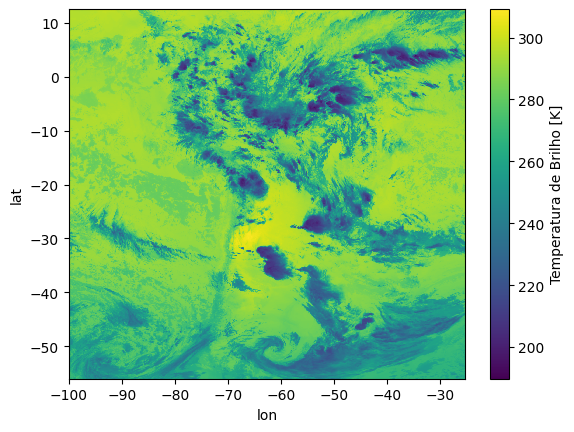

In [4]:
ds['tempir'].plot()